<a href="https://colab.research.google.com/github/mraslann/Stereo-Vision/blob/main/Stereo_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math
import cv2 as cv
from google.colab.patches import cv2_imshow

In [ ]:
def block_matching(img1,img2,window_size,met):
   rows = img2.shape[0]
   cols = img2.shape[1]
   disp = np.zeros((rows,cols))
   w_half = window_size // 2
   for i in range(w_half,rows-w_half):
     for j in range(w_half,cols-w_half):
       window = img1[i-w_half:i+w_half+1,j-w_half:j+w_half+1]
       minValue=math.inf
       index=0
       for k in range(w_half,cols-w_half):
         secWin= img2[i-w_half:i+w_half+1,k-w_half:k+w_half+1]
         if(met == "SAD"):
           err=np.sum(np.abs(np.subtract(window,secWin)))
         else:
           err=np.sum((np.subtract(window,secWin))**2)  
         if(err < minValue):
           minValue =err
           index = k
       disp[i][j]=(j-index)
   return  disp

In [ ]:
def dpR(img1,img2,c0,sigma,dp,l,r,row):
  if (l == 0 or r == 0 or dp[l][r] != 0):
    return dp[l][r]
  cost = (float(img1[row][l]) - float(img2[row][r]))**2 /(sigma**2)
  dp[l][r] = min(dpR(img1,img2,c0,sigma,dp,l-1,r-1,row)+cost,min(dpR(img1,img2,c0,sigma,dp,l-1,r,row),dpR(img1,img2,c0,sigma,dp,l,r-1,row))+c0)
  return dp[l][r]

In [ ]:
def dynamic_programming(img1,img2,c0 = 1,sigma = 2):
  rows = img1.shape[0]
  cols = img1.shape[1]
  output = np.zeros((rows,cols),dtype = np.float128)
  for i in range(rows):
    dp = np.zeros((cols,cols),dtype = np.float128)
    for(j)in range(cols):
      dp[0][j] = (j+1)*c0
      dp[j][0] = (j+1)*c0
    dp[0][0] = (float(img1[i][0]) - float(img2[i][0]))**2 /(sigma**2)
    dpR(img1,img2,c0,sigma,dp,cols-1,cols-1,i)
    r = cols - 1
    c = cols - 1
    while (r > 0 and c > 0):
      cost = (float(img1[i][r]) - float(img2[i][c]))**2 /(sigma**2)
      if dp[r][c] == dp[r-1][c-1] + cost:
          output[i][r] = abs(r - c)
          r -= 1
          c -= 1
      elif r != 0 and dp[r][c] == dp[r-1][c] + c0:
        r -= 1
      elif c != 0 and dp[r][c] == dp[r][c-1] + c0:
        c -= 1
  return output * 255 / np.max(output), dp

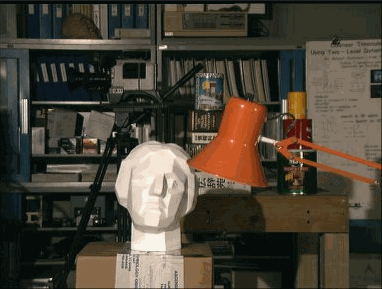

In [ ]:
left1 = cv.imread("l1.png")
cv2_imshow(left1)

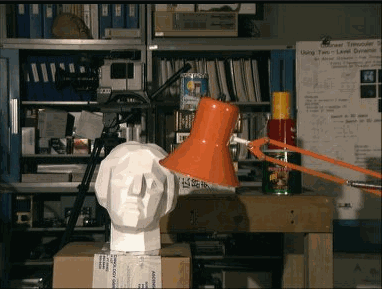

In [ ]:
right1 = cv.imread("r1.png")
cv2_imshow(right1)

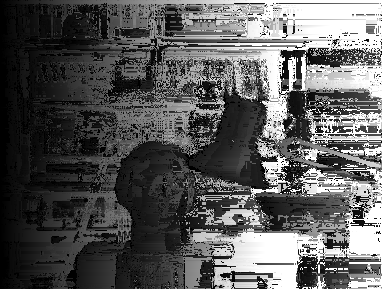

In [ ]:
output1SAD = block_matching(left1, right1, 1, "SAD")
cv2_imshow(output1SAD)

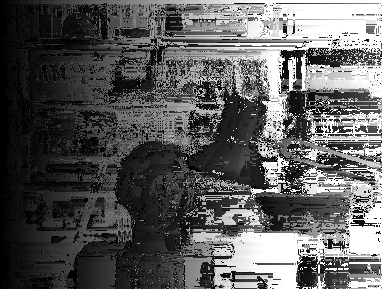

In [ ]:
output1SSD = block_matching(left1, right1, 1, "SSD")
cv2_imshow(output1SSD)

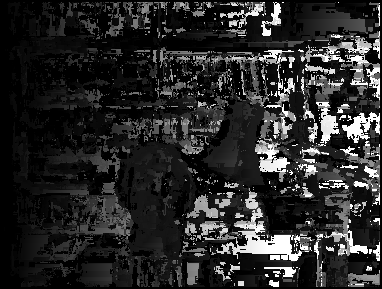

In [ ]:
output5SAD = block_matching(left1, right1, 5, "SAD")
cv2_imshow(output5SAD)

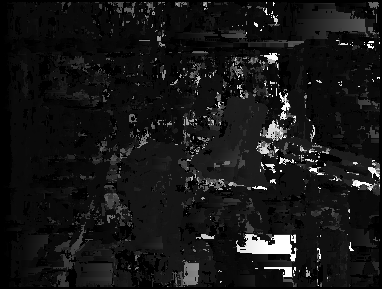

In [ ]:
output5SSD = block_matching(left1, right1, 5, "SSD")
cv2_imshow(output5SSD)

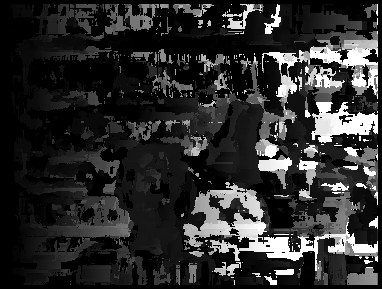

In [ ]:
output9SAD = block_matching(left1, right1, 9, "SAD")
cv2_imshow(output9SAD)

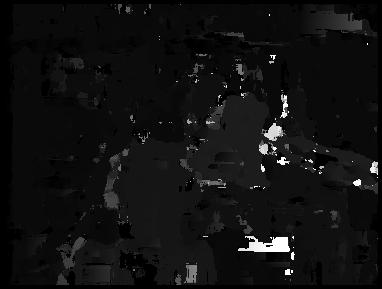

In [ ]:
output9SSD = block_matching(left1, right1, 9, "SSD")
cv2_imshow(output9SSD)

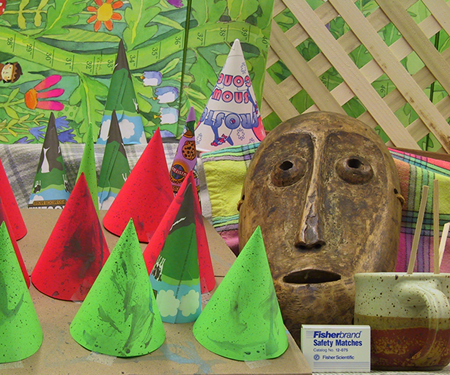

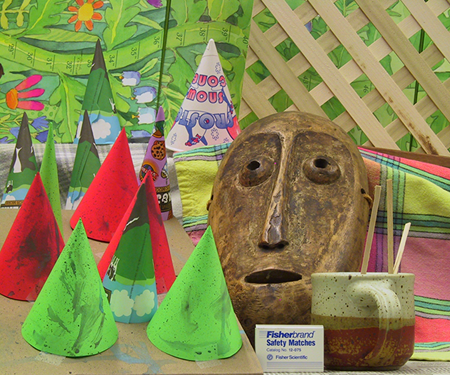

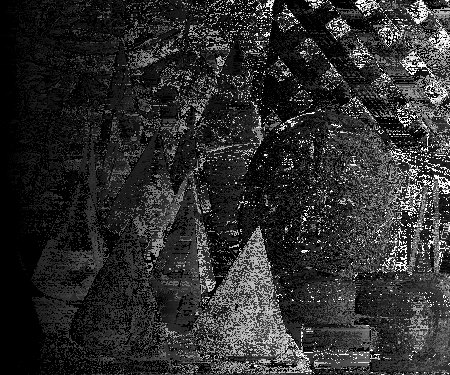

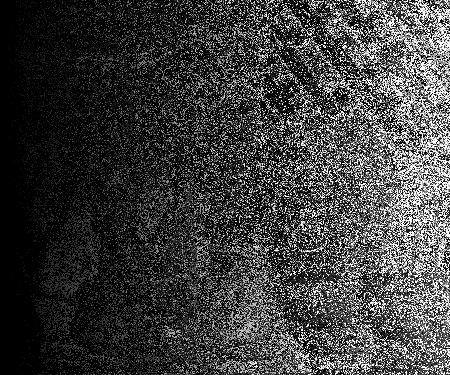

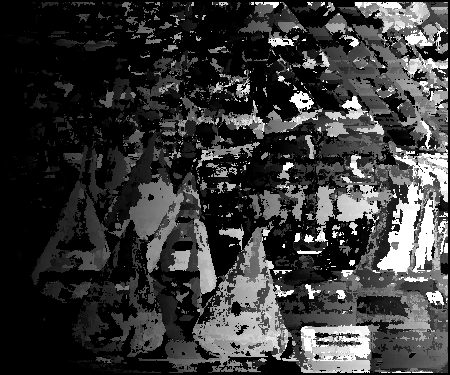

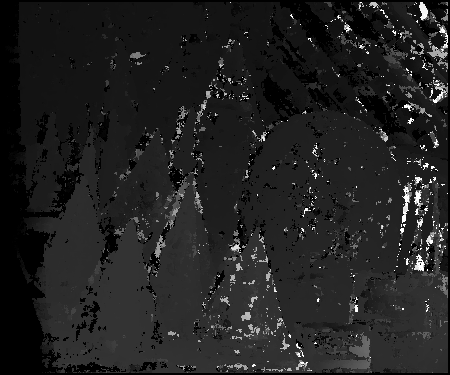

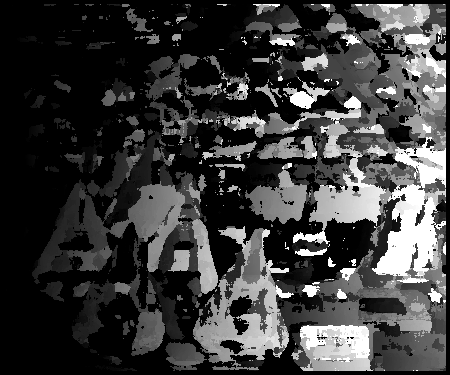

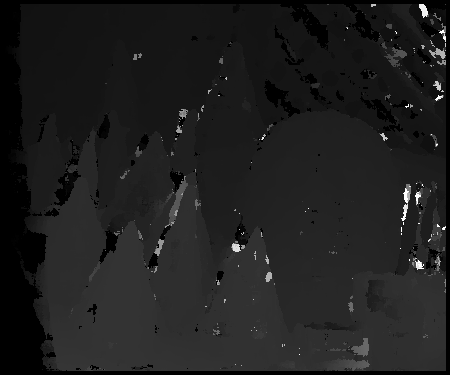

In [ ]:
left2 = cv.imread("l2.png")
cv2_imshow(left2)
right2 = cv.imread("r2.png")
cv2_imshow(right2)

output2SAD1 = block_matching(left2, right2, 1, "SAD")
cv2_imshow(output2SAD1)

output2SSD1 = block_matching(left2, right2, 1, "SSD")
cv2_imshow(output2SSD1)

output2SAD5 = block_matching(left2, right2, 5, "SAD")
cv2_imshow(output2SAD5)

output2SSD5 = block_matching(left2, right2, 5, "SSD")
cv2_imshow(output2SSD5)

output2SAD9 = block_matching(left2, right2, 9, "SAD")
cv2_imshow(output2SAD9)

output2SSD9 = block_matching(left2, right2, 9, "SSD")
cv2_imshow(output2SSD9)

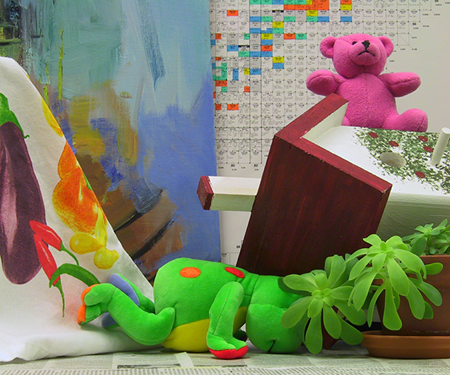

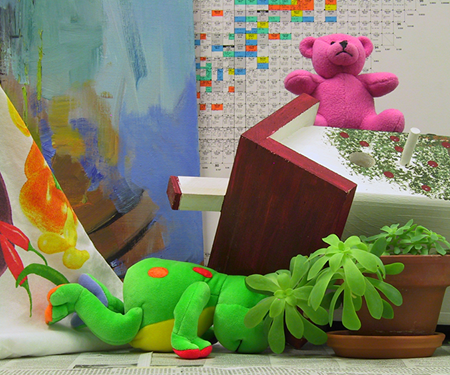

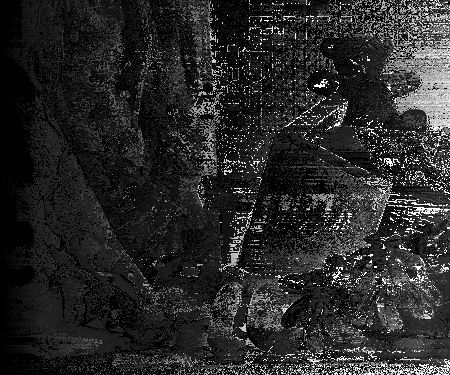

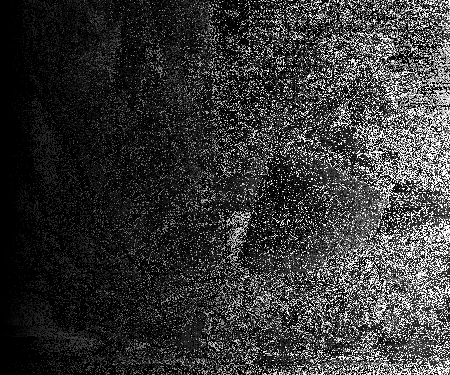

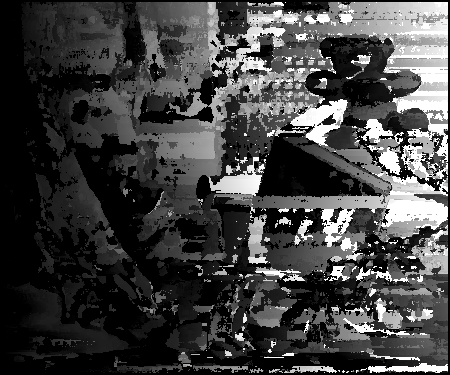

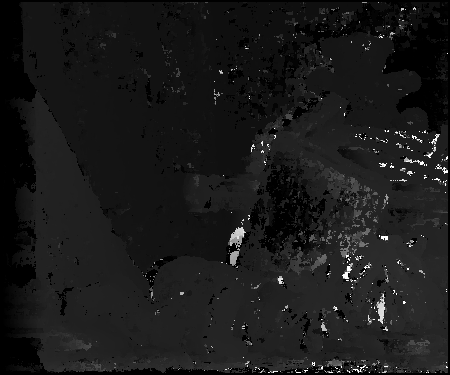

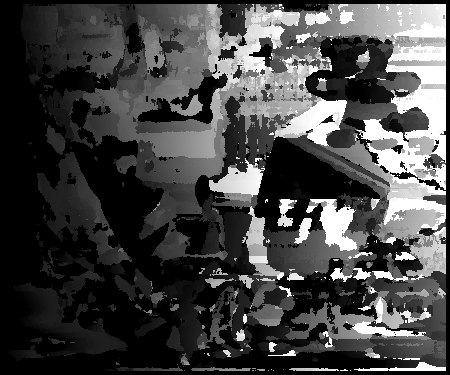

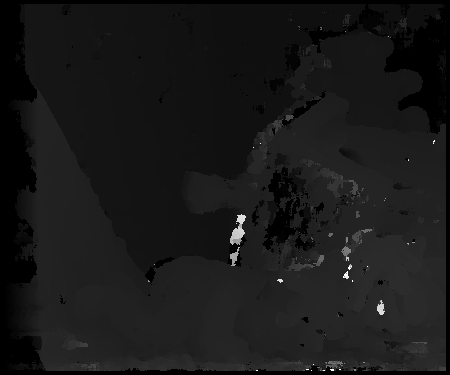

In [ ]:
left3 = cv.imread("l3.png")
cv2_imshow(left3)
right3 = cv.imread("r3.png")
cv2_imshow(right3)

output3SAD1 = block_matching(left3, right3, 1, "SAD")
cv2_imshow(output3SAD1)

output3SSD1 = block_matching(left3, right3, 1, "SSD")
cv2_imshow(output3SSD1)

output3SAD5 = block_matching(left3, right3, 5, "SAD")
cv2_imshow(output3SAD5)

output3SSD5 = block_matching(left3, right3, 5, "SSD")
cv2_imshow(output3SSD5)

output3SAD9 = block_matching(left3, right3, 9, "SAD")
cv2_imshow(output3SAD9)

output3SSD9 = block_matching(left3, right3, 9, "SSD")
cv2_imshow(output3SSD9)

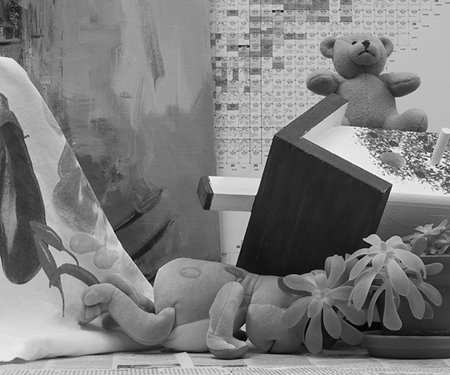

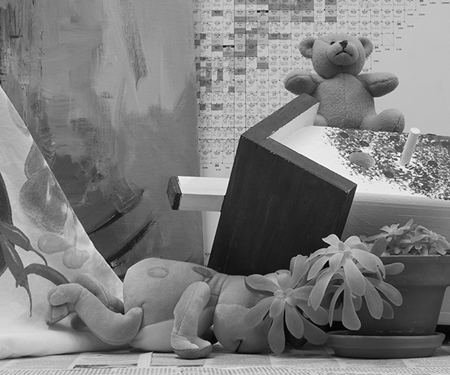

In [ ]:
img1 = cv.imread("l3.png", cv.IMREAD_GRAYSCALE)
img2 = cv.imread("r3.png", cv.IMREAD_GRAYSCALE)
cv2_imshow(img1)
cv2_imshow(img2)

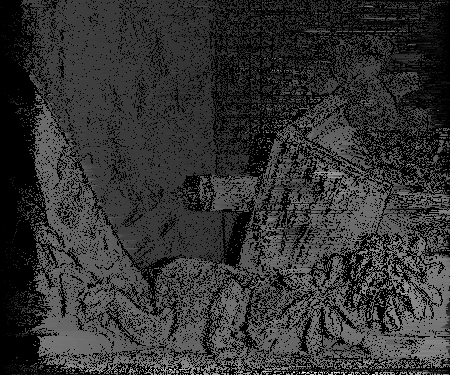

In [ ]:
output_image, dp = dynamic_programming(img1,img2)
cv2_imshow(output_image)

#Bonus part

In [ ]:
# img = np.zeros((len(dp), len(dp), 1), dtype = np.uint8)
# while i > 0 or j > 0:
#     if i > 0 and j > 0:
#         min_val = min(dp[i-1, j-1], dp[i-1, j], dp[i, j-1])
#         if min_val == dp[i-1, j-1]:
#             plt.plot([j, j-1], [i, i-1], '*')
#             i -= 1
#             j -= 1
#         elif min_val == D[i-1, j]:
#             plt.plot([j, j], [i, i-1], '*')
#             i -= 1
#         else:
#             plt.plot([j, j-1], [i, i], '*')
#             j -= 1
#     elif i > 0:
#         plt.plot([j, j], [i, i-1], '*')
#         i -= 1
#     else:
#         plt.plot([j, j-1], [i, i], '*')
#         j -= 1

# plt.show()


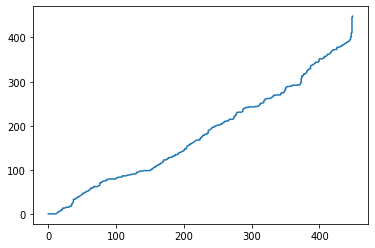

In [ ]:
import matplotlib.pyplot as plt

r = img1.shape[1] - 1
c = img1.shape[1] - 1
i = img1.shape[0] - 1
c0 = 1
#
# leftscanline = img1[r]
# rightscanline = img2[r]
sigma = 2
x_axis = []
y_axis = []
while (r > 0 and c > 0):
  cost = (float(img1[i][r]) - float(img2[i][c]))**2 /(sigma**2)
  if dp[r][c] == dp[r-1][c-1] + cost:
    # matched pixels draw a diagonal line
      
      r -= 1
      c -= 1
      x_axis.append(r)
      y_axis.append(c)
  elif r != 0 and dp[r][c] == dp[r-1][c] + c0:
    # skip in Ir draw a horizontal line 
    r -= 1
    x_axis.append(r)
    y_axis.append(c)
  elif c != 0 and dp[r][c] == dp[r][c-1] + c0:
    # skip in Il draw a vertical line
    c -= 1
    x_axis.append(r)
    y_axis.append(c)
plt.plot(x_axis, y_axis)
plt.show()